In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

In [2]:
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
device

device(type='cpu')

In [7]:
ticker = 'AAPL'
df = yf.download(ticker,'2020-01-01')

C:\Users\himan\AppData\Local\Temp\ipykernel_17912\1266454546.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,'2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600


<Axes: xlabel='Date'>

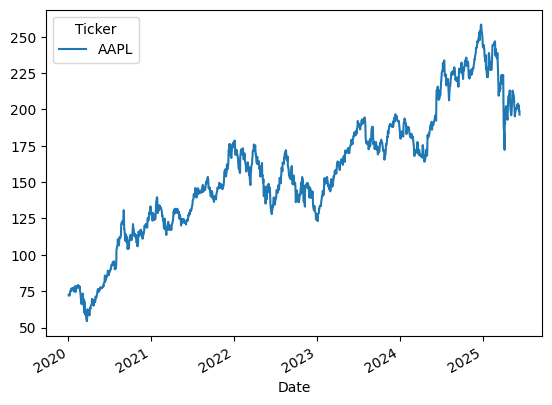

In [9]:
df.Close.plot()

In [10]:
scaler = StandardScaler()

df['Close'] = scaler.fit_transform(df['Close'])

In [11]:
df.Close

Ticker,AAPL
Date,
2020-01-02,-1.909413
2020-01-03,-1.925322
2020-01-06,-1.912410
2020-01-07,-1.920092
2020-01-08,-1.893939
...,...
2025-06-09,0.993661
2025-06-10,1.021153
2025-06-11,0.933495


In [ ]:
seq_length = 30
data = []

for i in range(len(df) - seq_length):
    data.append(df.Close[i:i+seq_length])

data = np.array